# <font color='red'>Install Dependencies<font>

In [1]:
!pip install -q datasets diffusers transformers accelerate torchmetrics[image]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.7 MB/s eta 0:00:00


# <font color='red'>Qualitative<font>
- Qualitative evaluation typically involves human assessment of generated imagesQuality is measured across aspects such as compositionality, image-text alignment, and spatial relations.

## <font color='green'>Create Dataset<font>

In [2]:
from datasets import load_dataset

# prompts = load_dataset("nateraw/parti-prompts", split="train")
# prompts = prompts.shuffle()
# sample_prompts = [prompts[i]["Prompt"] for i in range(5)]

# Fixing these sample prompts in the interest of reproducibility.
sample_prompts = [
    "a tiger",
    "a hot air balloon with a yin-yang symbol, with the moon visible in the daytime sky",
    "a car with no windows",
    "a cube made of porcupine",
    'The saying "BE EXCELLENT TO EACH OTHER" written on a red brick wall with a graffiti image of a green alien wearing a tuxedo. A yellow fire hydrant is on a sidewalk in the foreground.',
]

## <font color='green'>Stable Diffusion `v1.4`<font>

### <font color='blue'>Create Pipeline<font>

In [3]:
from diffusers import StableDiffusionPipeline
import torch

model_ckpt_1_4 = "CompVis/stable-diffusion-v1-4"
device = "cuda"
weight_dtype = torch.float16
sd_pipeline_1_4 = StableDiffusionPipeline.from_pretrained(model_ckpt_1_4, torch_dtype=weight_dtype).to(device)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


### <font color='blue'>Generate image from pipeline `(1 image per prompt)`<font>

In [4]:
seed = 0
generator = torch.manual_seed(seed)

images_1_4 = sd_pipeline_1_4(
    sample_prompts, num_images_per_prompt=1, generator=generator, output_type="numpy"
).images

print(images_1_4.shape)

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


(5, 512, 512, 3)


/usr/local/lib/python3.10/dist-packages/diffusers/image_processor.py:385: FutureWarning: the output_type numpy is outdated and has been set to `np`. Please make sure to set it to one of these instead: `pil`, `np`, `pt`, `latent`
  deprecate("Unsupported output_type", "1.0.0", deprecation_message, standard_warn=False)


### <font color='blue'>Visualise image<font>

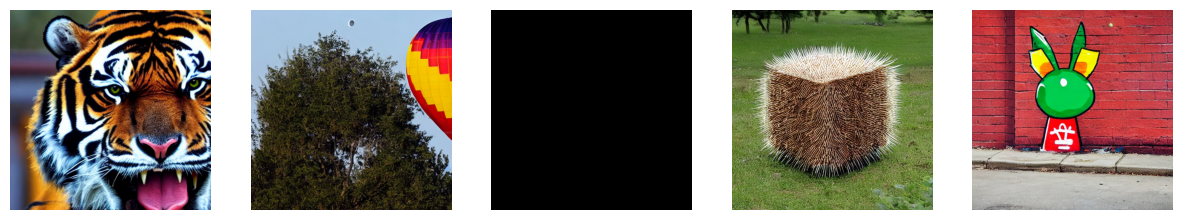

In [5]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 15))
for i in range(len(images_1_4)):
  plt.subplot(1, len(images_1_4), i+1)
  plt.imshow(images_1_4[i])
  plt.axis("off")
plt.show()

### <font color='blue'>Generate image from pipeline `(5 image per prompt)`<font>

In [6]:
images_1_4 = sd_pipeline_1_4(
    sample_prompts, num_images_per_prompt=5, generator=generator, output_type="numpy"
).images

print(images_1_4.shape)

  0%|          | 0/50 [00:00<?, ?it/s]

(25, 512, 512, 3)


### <font color='blue'>Visualise image<font>

In [7]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 15))
for i in range(len(images_1_4)):
  plt.subplot(5, int(len(images_1_4)/5), i+1)
  plt.imshow(images_1_4[i])
  plt.axis("off")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## <font color='green'>Stable Diffusion `v1.5`<font>

### <font color='blue'>Create Pipeline<font>

In [8]:
model_ckpt_1_5 = "runwayml/stable-diffusion-v1-5"
sd_pipeline_1_5 = StableDiffusionPipeline.from_pretrained(model_ckpt_1_5, torch_dtype=weight_dtype).to(device)

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


### <font color='blue'>Generate image from pipeline `(1 image per prompt)`<font>

In [9]:
images_1_5 = sd_pipeline_1_5(
    sample_prompts, num_images_per_prompt=1, generator=generator, output_type="np"
).images
print("-------------------------")
print("shape: ",images_1_5.shape)

  0%|          | 0/50 [00:00<?, ?it/s]

-------------------------
shape:  (5, 512, 512, 3)


### <font color='blue'>Visualise image<font>

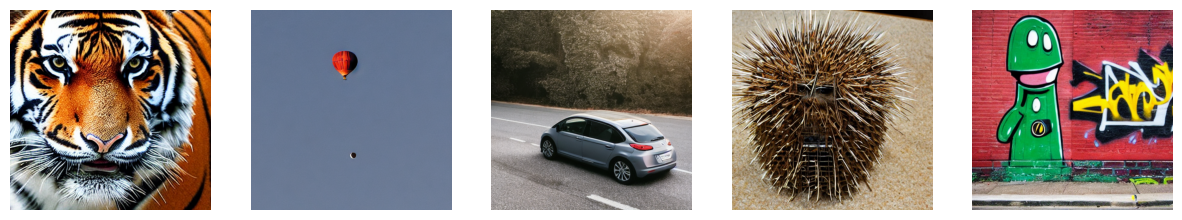

In [10]:
plt.figure(figsize=(15, 15))
for i in range(len(images_1_5)):
  plt.subplot(1, len(images_1_5), i+1)
  plt.imshow(images_1_5[i])
  plt.axis("off")
plt.show()

### <font color='blue'>Generate image from pipeline `(4 image per prompt)`<font>

<font color='red'>Cannot run -> Out of gpu memory `(5 image per prompt)` 👽<font>




In [11]:
images_1_5 = sd_pipeline_1_5(
    sample_prompts, num_images_per_prompt=4, generator=generator, output_type="np"
).images
print("-------------------------")
print("shape: ",images_1_5.shape)

  0%|          | 0/50 [00:00<?, ?it/s]

-------------------------
shape:  (20, 512, 512, 3)


### <font color='blue'>Visualise image<font>

In [12]:
plt.figure(figsize=(15, 15))
for i in range(len(images_1_5)):
  plt.subplot(4, int(len(images_1_5)/4), i+1)
  plt.imshow(images_1_5[i])
  plt.axis("off")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# <font color='red'>Quantitative<font>

## <font color='green'>CLIP Score<font>
- measures the compatibility of image-caption pairs. Higher CLIP scores imply
higher compatibility.The CLIP score is a quantitative measurement of the qualitative concept "compatibility"

In [13]:
prompts = [
    "a photo of an astronaut riding a horse on mars",
    "A high tech solarpunk utopia in the Amazon rainforest",
    "A pikachu fine dining with a view to the Eiffel Tower",
    "A mecha robot in a favela in expressionist style",
    "an insect robot preparing a delicious meal",
    "A small cabin on top of a snowy mountain in the style of Disney, artstation",
]

images_1_4 = sd_pipeline_1_4(prompts, num_images_per_prompt=1, output_type="np").images

print(images_1_4.shape)

  0%|          | 0/50 [00:00<?, ?it/s]

(6, 512, 512, 3)


### <font color='blue'>Single model<font>

In [14]:
# Calculate CLIP score
from torchmetrics.functional.multimodal import clip_score
from functools import partial

clip_score_fn = partial(clip_score, model_name_or_path="openai/clip-vit-base-patch16")


def calculate_clip_score(images, prompts):
    images_int = (images * 255).astype("uint8")
    clip_score = clip_score_fn(torch.from_numpy(images_int).permute(0, 3, 1, 2), prompts).detach()
    return round(float(clip_score), 4)


sd_clip_score = calculate_clip_score(images_1_4, prompts)
print(f"CLIP score: {sd_clip_score}")

config.json:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

CLIP score: 35.3981


### <font color='blue'>Compare two checkpoint<font>

In [15]:
seed = 0
generator = torch.manual_seed(seed)

images_1_4 = sd_pipeline_1_4(prompts, num_images_per_prompt=1, generator=generator, output_type="np").images

  0%|          | 0/50 [00:00<?, ?it/s]

In [16]:
# model v1.5
model_ckpt_1_5 = "runwayml/stable-diffusion-v1-5"
sd_pipeline_1_5 = StableDiffusionPipeline.from_pretrained(model_ckpt_1_5, torch_dtype=weight_dtype).to(device)

images_1_5 = sd_pipeline_1_5(
    prompts, num_images_per_prompt=1, generator=generator, output_type="np"
).images

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

In [17]:
sd_clip_score_1_4 = calculate_clip_score(images_1_4, prompts)
print(f"CLIP Score with v-1-4: {sd_clip_score_1_4}")
print("--------------------------")
sd_clip_score_1_5 = calculate_clip_score(images_1_5, prompts)
print(f"CLIP Score with v-1-5: {sd_clip_score_1_5}")

CLIP Score with v-1-4: 34.8663
--------------------------
CLIP Score with v-1-5: 36.3612


**-> Stable Diffusion v1.5 has higher score than v1.4**

## <font color='green'>FID (Fréchet Inception Distance)<font>

> Fréchet Inception Distance is a measure of similarity between two datasets of images. It was shown to correlate well with the human judgment of visual quality and is most often used to evaluate the quality of samples of Generative Adversarial Networks. FID is calculated by computing the Fréchet distance between two Gaussians fitted to feature representations of the Inception network.



### <font color='blue'>Load Image<font>

In [18]:
from zipfile import ZipFile
import requests


def download(url, local_filepath):
    r = requests.get(url)
    with open(local_filepath, "wb") as f:
        f.write(r.content)
    return local_filepath


dummy_dataset_url = "https://hf.co/datasets/sayakpaul/sample-datasets/resolve/main/sample-imagenet-images.zip"
local_filepath = download(dummy_dataset_url, dummy_dataset_url.split("/")[-1])

with ZipFile(local_filepath, "r") as zipper:
    zipper.extractall(".")

**Extract 10 images from the following Imagenet-1k
classes: "cassette_player", "chain_saw" (x2), "church", "gas_pump" (x3), "parachute" (x2), and "tench".**

In [19]:
from PIL import Image
import numpy as np
import os

dataset_path = "sample-imagenet-images"
image_paths = sorted([os.path.join(dataset_path, x) for x in os.listdir(dataset_path)])

real_images = [np.array(Image.open(path).convert("RGB")) for path in image_paths]

### <font color='blue'>Preprocessing Image<font>

In [20]:
from torchvision.transforms import functional as F


def preprocess_image(image):
    image = torch.tensor(image).unsqueeze(0)
    image = image.permute(0, 3, 1, 2) / 255.0
    return F.center_crop(image, (256, 256))


real_images = torch.cat([preprocess_image(image) for image in real_images])
print(real_images.shape)

torch.Size([10, 3, 256, 256])


### <font color='blue'>Generate Images conditioned on the above-metioned classes (fake images)<font>

In [21]:
from diffusers import DiTPipeline, DPMSolverMultistepScheduler

dit_pipeline = DiTPipeline.from_pretrained("facebook/DiT-XL-2-256", torch_dtype=torch.float16)
dit_pipeline.scheduler = DPMSolverMultistepScheduler.from_config(dit_pipeline.scheduler.config)
dit_pipeline = dit_pipeline.to("cuda")

model_index.json:   0%|          | 0.00/35.8k [00:00<?, ?B/s]

transformer/diffusion_pytorch_model.safetensors not found


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

vae/config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

transformer/config.json:   0%|          | 0.00/602 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/310 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.00G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

In [22]:
words = [
    "cassette player",
    "chainsaw",
    "chainsaw",
    "church",
    "gas pump",
    "gas pump",
    "gas pump",
    "parachute",
    "parachute",
    "tench",
]

class_ids = dit_pipeline.get_label_ids(words)
output = dit_pipeline(class_labels=class_ids, generator=generator, output_type="numpy")

fake_images = output.images
fake_images = torch.tensor(fake_images)
fake_images = fake_images.permute(0, 3, 1, 2)
print(fake_images.shape)

  0%|          | 0/50 [00:00<?, ?it/s]

torch.Size([10, 3, 256, 256])


### <font color='blue'>Compute FID Score<font>

In [23]:
from torchmetrics.image.fid import FrechetInceptionDistance

fid = FrechetInceptionDistance(normalize=True)
fid.update(real_images, real=True)
fid.update(fake_images, real=False)

print(f"FID: {float(fid.compute())}")

Downloading: "https://github.com/toshas/torch-fidelity/releases/download/v0.2.0/weights-inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/weights-inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:00<00:00, 247MB/s]


FID: 204.0412139892578


**The lower FID the better it is**

### <font color='blue'>Visualize fake and real images<font>

**fake images**

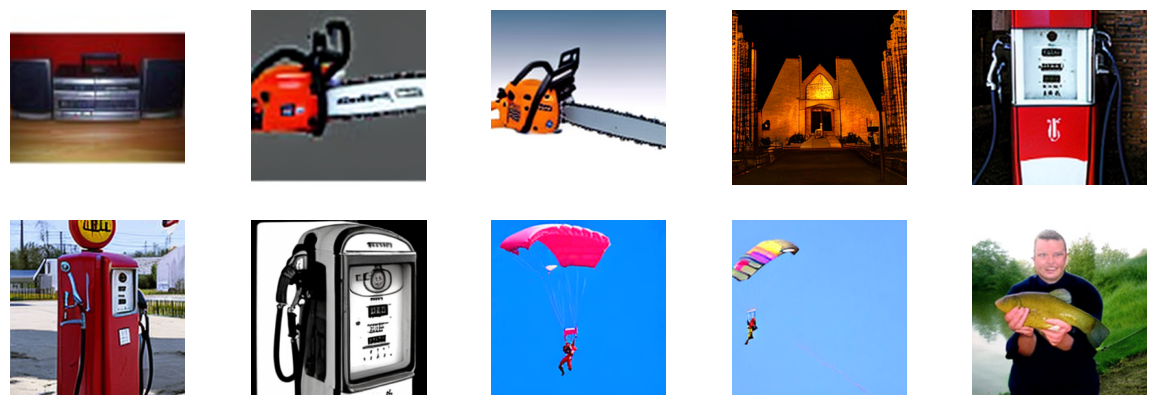

In [24]:
plt.figure(figsize=(15, 5))
for i in range(len(fake_images)):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(fake_images[i].numpy().transpose(1, 2, 0))
    plt.axis("off")
plt.show()

**real images**

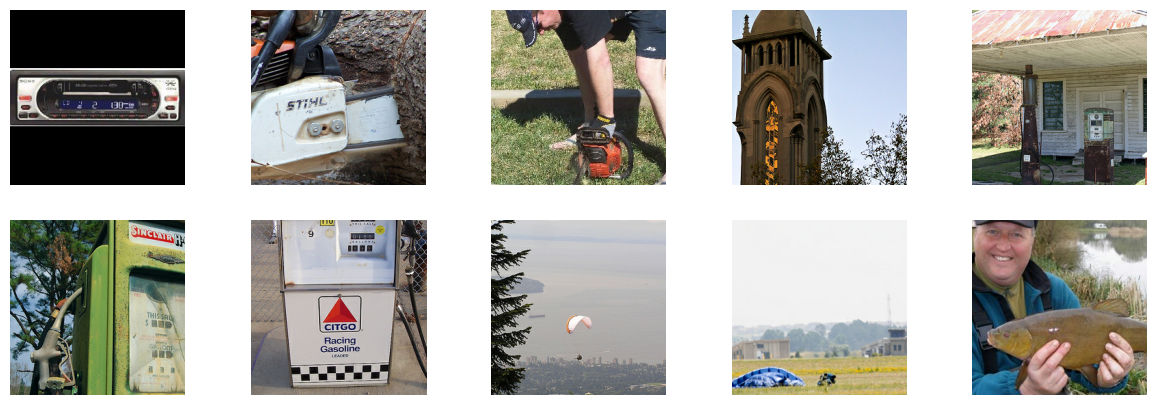

In [25]:
plt.figure(figsize=(15, 5))
for i in range(len(real_images)):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(real_images[i].numpy().transpose(1, 2, 0))
    plt.axis("off")
plt.show()